In [1]:
from xenonnt_plot_style import XENONPlotStyle as xps

xps.use("xenonnt")

In [2]:
from functools import partial
import numpy as np
from tqdm import tqdm
from scipy.interpolate import interp1d, interp2d
from scipy.stats import norm, poisson
from iminuit import Minuit
import matplotlib.pyplot as plt
from fitdis.dune.oscillation import E_vs
from fitdis.dune.oscillation import MASS, BASELINE, ARGON_MOL_MASS, AVOGADRO, POT_PER_YEAR
from fitdis.dune.oscillation import ND_FLUX, ND_FD_RATIO, SIN_2_THETA_23
from fitdis.dune.oscillation import appearance

In [3]:
sigmas = np.load("sigmas.npy")

In [4]:
E_vs_edges = np.linspace(0.5, 8.5, 9)

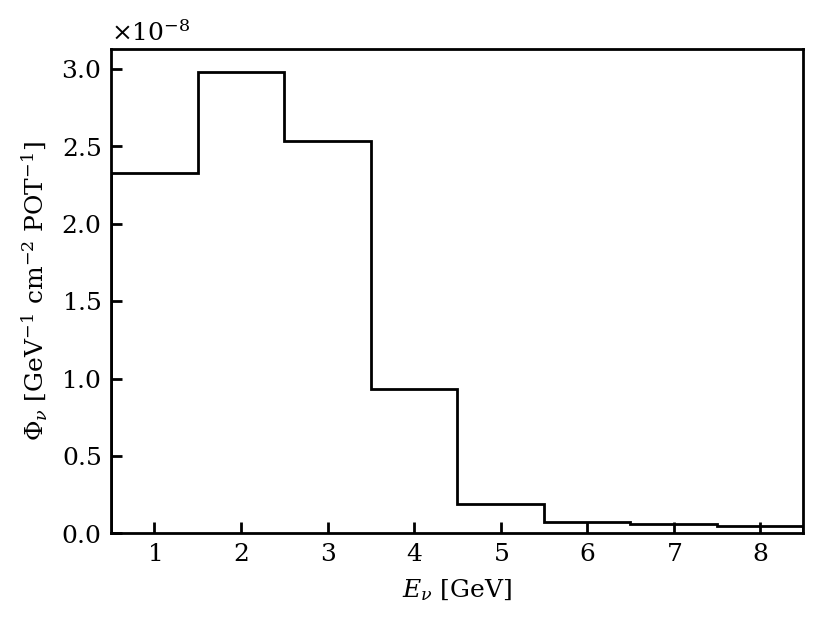

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))

ax.stairs(
    edges=E_vs_edges,
    values=ND_FLUX,
)

ax.set_xlabel(r"$E_\nu$ [GeV]")
ax.set_ylabel(r"$\Phi_\nu$ [GeV$^{-1}$ cm$^{-2}$ POT$^{-1}$]")
ax.set_xlim(E_vs_edges[0], E_vs_edges[-1])

fig.savefig("nd_flux.svg", transparent=True, dpi=800)

plt.show()

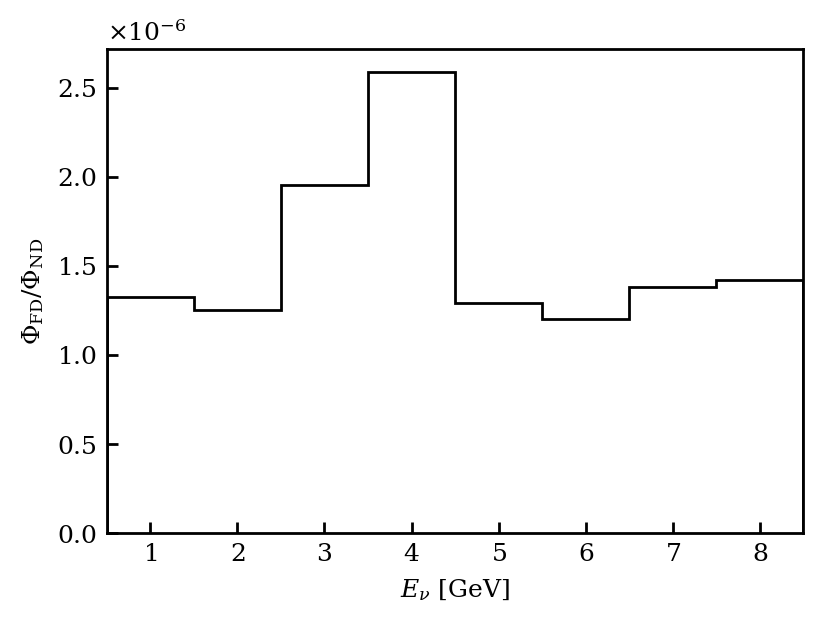

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))

ax.stairs(
    edges=E_vs_edges,
    values=ND_FD_RATIO,
)

ax.set_xlabel(r"$E_\nu$ [GeV]")
ax.set_ylabel(r"$\Phi_{\mathrm{FD}}/\Phi_{\mathrm{ND}}$")
ax.set_xlim(E_vs_edges[0], E_vs_edges[-1])

fig.savefig("fd_nd_ratio.svg", transparent=True, dpi=800)

plt.show()

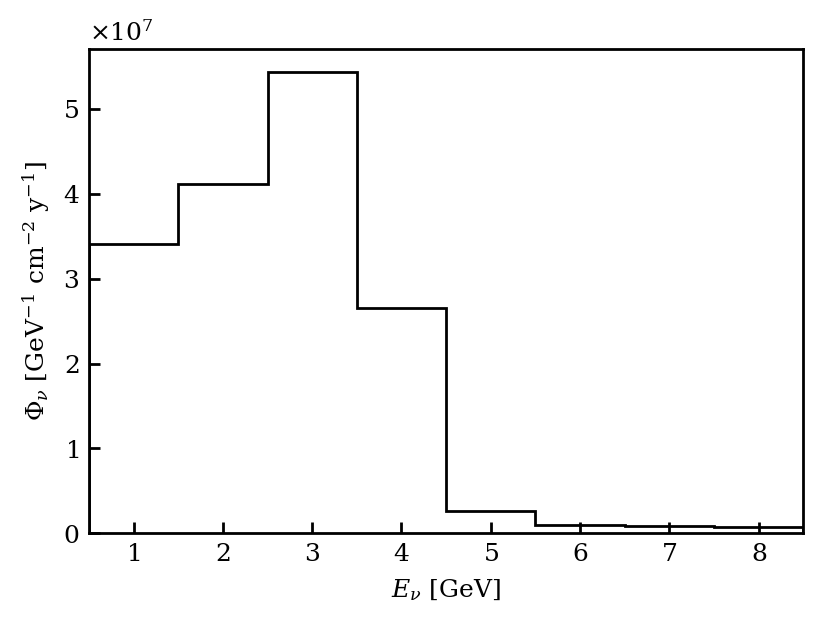

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))

ax.stairs(
    edges=E_vs_edges,
    values=ND_FLUX * ND_FD_RATIO * POT_PER_YEAR,
)

ax.set_xlabel(r"$E_\nu$ [GeV]")
ax.set_ylabel(r"$\Phi_\nu$ [GeV$^{-1}$ cm$^{-2}$ y$^{-1}$]")
ax.set_xlim(E_vs_edges[0], E_vs_edges[-1])

fig.savefig("fd_flux.svg", transparent=True, dpi=800)

plt.show()

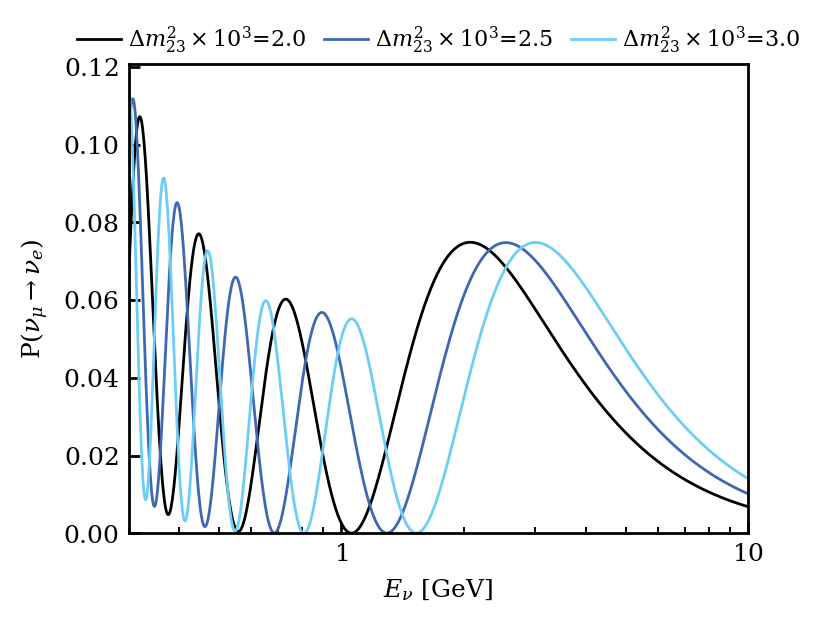

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))

_E_vs = np.geomspace(3e-1, 1e1, 1001)

ax.plot(_E_vs, appearance(_E_vs, delta_m_2_32=2.0e-3), label=r"$\Delta m_{23}^2\times 10^3$=2.0")
ax.plot(_E_vs, appearance(_E_vs, delta_m_2_32=2.5e-3), label=r"$\Delta m_{23}^2\times 10^3$=2.5")
ax.plot(_E_vs, appearance(_E_vs, delta_m_2_32=3.0e-3), label=r"$\Delta m_{23}^2\times 10^3$=3.0")

ax.legend(ncols=3)
ax.set_xlabel(r"$E_\nu$ [GeV]")
ax.set_ylabel(r"P($\nu_\mu\rightarrow\nu_e$)")
ax.set_xlim(_E_vs[0], _E_vs[-1])
ax.set_ylim(bottom=0)
ax.set_xscale("log")

fig.savefig("delta_m_2_32.svg", transparent=True, dpi=800)

plt.show()

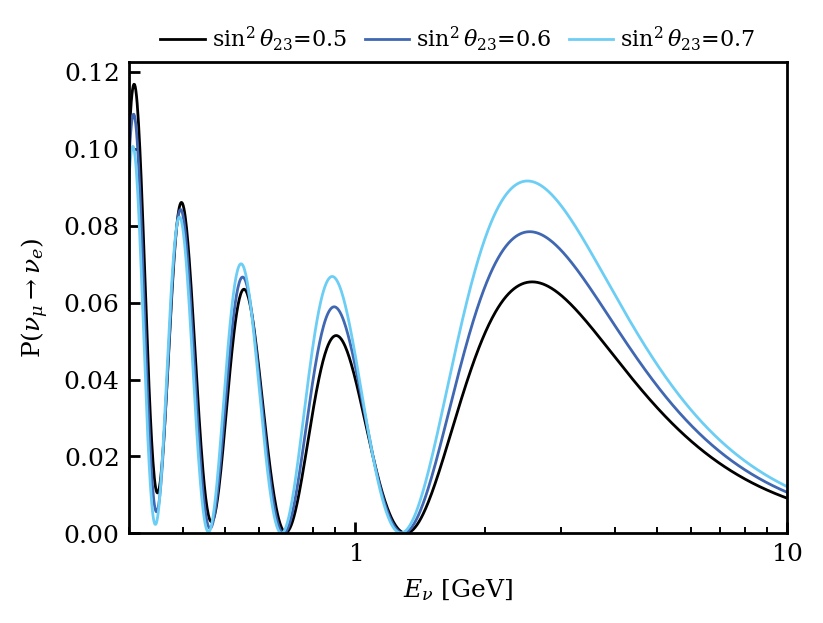

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))

_E_vs = np.geomspace(3e-1, 1e1, 1001)

ax.plot(_E_vs, appearance(_E_vs, sin_2_theta_23=0.5), label=r"$\sin^2\theta_{23}$=0.5")
ax.plot(_E_vs, appearance(_E_vs, sin_2_theta_23=0.6), label=r"$\sin^2\theta_{23}$=0.6")
ax.plot(_E_vs, appearance(_E_vs, sin_2_theta_23=0.7), label=r"$\sin^2\theta_{23}$=0.7")

ax.legend(ncols=3)
ax.set_xlabel(r"$E_\nu$ [GeV]")
ax.set_ylabel(r"P($\nu_\mu\rightarrow\nu_e$)")
ax.set_xlim(_E_vs[0], _E_vs[-1])
ax.set_ylim(bottom=0)
ax.set_xscale("log")

fig.savefig("sin_2_theta_23.svg", transparent=True, dpi=800)

plt.show()

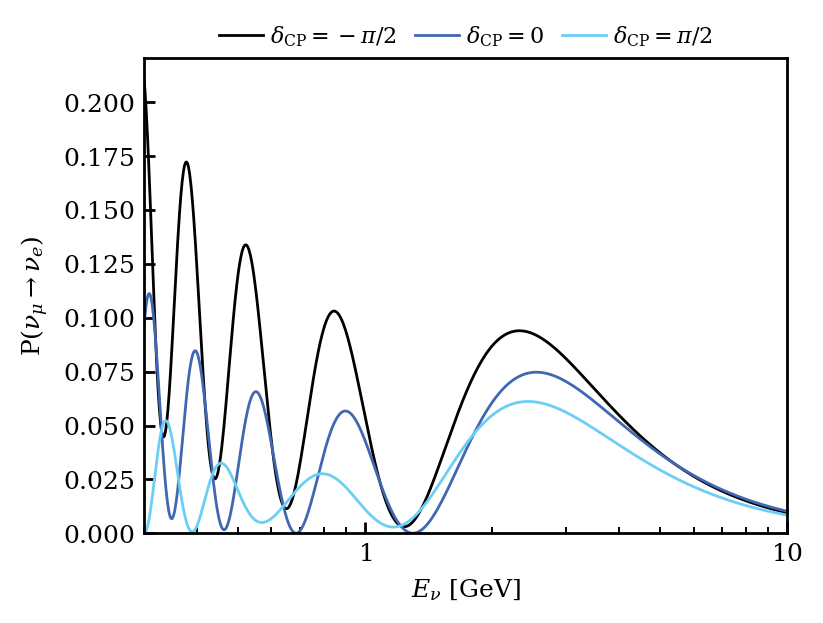

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))

_E_vs = np.geomspace(3e-1, 1e1, 1001)

ax.plot(_E_vs, appearance(_E_vs, delta_cp=-np.pi / 2), label="$\delta_{\mathrm{CP}}=-\pi/2$")
ax.plot(_E_vs, appearance(_E_vs, delta_cp=0), label="$\delta_{\mathrm{CP}}=0$")
ax.plot(_E_vs, appearance(_E_vs, delta_cp=np.pi / 2), label="$\delta_{\mathrm{CP}}=\pi/2$")

ax.legend(ncols=3)
ax.set_xlabel(r"$E_\nu$ [GeV]")
ax.set_ylabel(r"P($\nu_\mu\rightarrow\nu_e$)")
ax.set_xlim(_E_vs[0], _E_vs[-1])
ax.set_ylim(bottom=0)
ax.set_xscale("log")

fig.savefig("delta_cp.svg", transparent=True, dpi=800)

plt.show()

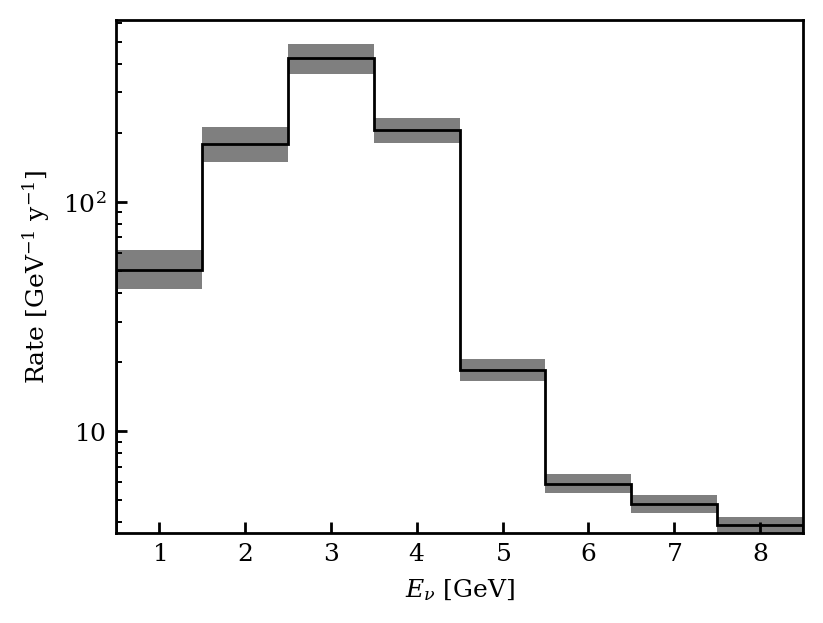

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))

factor = 1e-38 * ND_FLUX * ND_FD_RATIO * POT_PER_YEAR * MASS * 1e6 * AVOGADRO
factor *= appearance(E_vs)
ax.stairs(
    edges=E_vs_edges,
    values=sigmas[0, : len(E_vs)] * factor,
)
sigma_mp = np.quantile(sigmas[1:, : len(E_vs)], norm.cdf([-1, 1]), axis=0)
ax.bar(
    E_vs,
    height=(sigma_mp[1] - sigma_mp[0]) * factor,
    width=1.0,
    bottom=sigma_mp[0] * factor,
    alpha=0.5,
)

ax.set_xlabel(r"$E_\nu$ [GeV]")
ax.set_ylabel(r"Rate [GeV$^{-1}$ y$^{-1}$]")
ax.set_xlim(E_vs_edges[0], E_vs_edges[-1])
ax.set_yscale("log")

fig.savefig("fd_rate.svg", transparent=True, dpi=800)

plt.show()

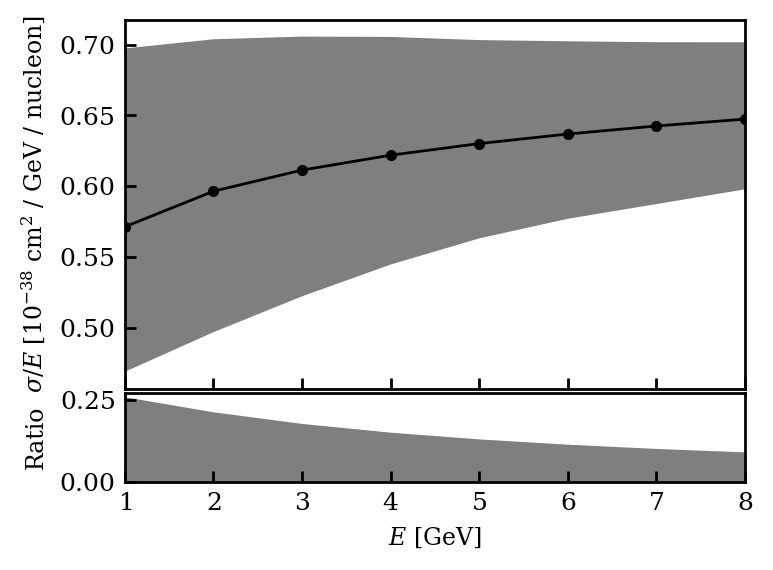

In [12]:
fontsize = 8.5

with plt.rc_context({"figure.constrained_layout.use": False}):
    fig = plt.figure(figsize=(4, 3))
    gs = fig.add_gridspec(5, 5, wspace=0, hspace=0.05)
    ax = fig.add_subplot(gs[:4, :])
    pax = fig.add_subplot(gs[4:, :], sharex=ax)

    ax.plot(
        E_vs,
        sigmas[0, : len(E_vs)] / E_vs,
        marker="o",
    )
    ax.fill_between(
        E_vs,
        sigma_mp[0] / E_vs,
        sigma_mp[1] / E_vs,
        edgecolor=None,
        alpha=0.5,
    )
    ax.set_xlim(E_vs[0], E_vs[-1])
    ax.set_ylabel(r"$\sigma/E$ [$10^{-38}$ cm$^2$ / GeV / nucleon]", fontsize=fontsize)
    ax.tick_params(axis="x", labelcolor=(0, 0, 0, 0))

    pax.fill_between(
        E_vs,
        0,
        np.std(sigmas[1:, : len(E_vs)], axis=0) / sigmas[0, : len(E_vs)],
        edgecolor=None,
        alpha=0.5,
    )
    pax.set_xlim(E_vs[0], E_vs[-1])
    pax.set_ylim(bottom=0)

    pax.set_ylabel(r"Ratio", fontsize=fontsize)
    pax.set_xlabel("$E$ [GeV]", fontsize=fontsize)

    fig.savefig("sigmas_ratio.svg", transparent=True, dpi=800)

    plt.show()

In [13]:
yr = 3
factor = 1e-38 * ND_FLUX * ND_FD_RATIO * POT_PER_YEAR * MASS * 1e6 * AVOGADRO
factor *= yr


def sigma_ratio(t, E_vs):
    return np.std(sigmas[1:, : len(E_vs)], axis=0) / sigmas[0, : len(E_vs)] * t + 1


def loglikelihood(delta_cp, sin_2_theta_23, t, scale, E_vs, factor, n_obs):
    if np.isnan(t):
        return np.nan
    n_exp = sigma_ratio(t, E_vs) * appearance(
        E_vs, sin_2_theta_23=sin_2_theta_23, delta_cp=delta_cp
    )
    n_exp *= factor
    chi2_rate = -2 * poisson.logpmf(n_obs, mu=n_exp).sum()
    # chi2_rate = ((n_obs - n_exp) ** 2 / n_exp).sum()
    chi2_pull = (t / scale) ** 2
    chi2 = chi2_rate + chi2_pull
    return chi2

In [14]:
rng = np.random.default_rng(seed=7)
n_exp = (
    sigma_ratio(0.0, E_vs) * appearance(E_vs, sin_2_theta_23=SIN_2_THETA_23, delta_cp=0.0) * factor
)
# n_obs = rng.poisson(lam=n_exp)
n_obs = np.floor(n_exp).astype(int)

In [15]:
ll_func = partial(
    loglikelihood,
    E_vs=E_vs,
    factor=factor,
    n_obs=n_obs,
)


def min_likelihood(init, ll, fixed, limits, errors, precision=None, neval=3, uncertainty=False):
    m = Minuit(ll_func, *init, name=("delta_cp", "sin_2_theta_23", "t", "scale"))
    m.errordef = 1
    m.strategy = 0
    m.fixed = fixed
    m.limits = limits
    m.simplex()
    for _ in range(neval):
        m.migrad()
    if not m.valid:
        m.scan()
        m.simplex()
        for _ in range(neval):
            m.migrad()
    if uncertainty:
        m.hesse()
        # m.minos()
    return m

In [16]:
fixed = [True, True, False, True]
limits = [[-np.pi / 2, np.pi / 2], [0.3, 0.9], [-2, 2], [0, 3]]
errors = np.full(4, 1e-3)

min_likelihood_func = partial(
    min_likelihood,
    ll=ll_func,
    fixed=fixed,
    limits=limits,
    errors=errors,
)

100%|██████████| 4/4 [00:06<00:00,  1.50s/it]


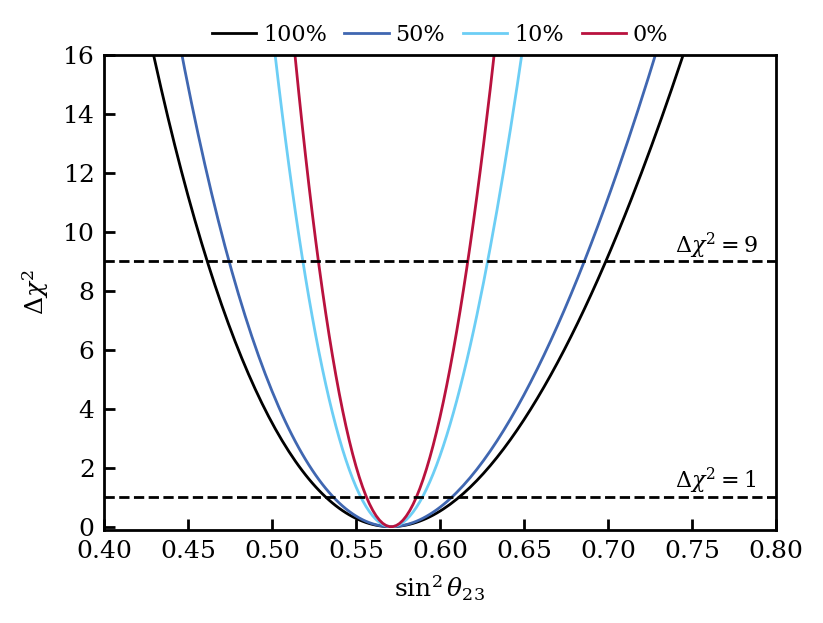

In [17]:
sin_2_theta_23_list = np.linspace(0.4, 0.8, 201)

fig, ax = plt.subplots(1, 1, figsize=(4, 3))

scales = [0.001, 0.1, 0.5, 1.0][::-1]

fval = dict()
for scale in tqdm(scales):
    fval[scale] = []
    for sin_2_theta_23 in sin_2_theta_23_list:
        fval[scale].append(min_likelihood_func([0.0, sin_2_theta_23, 0.0, scale]).fval)
    fval[scale] = np.array(fval[scale])

colors = []
for scale in scales:
    p = ax.plot(
        sin_2_theta_23_list,
        fval[scale] - fval[scale].min(),
        label=f"{int(scale * 100)}%",
    )
    colors.append(p[0].get_color())

ax.legend(ncols=len(scales))
x = sin_2_theta_23_list[0] * 0.15 + sin_2_theta_23_list[-1] * 0.85
ax.text(x, 1.3, r"$\Delta \chi^2=1$", fontsize=8)
ax.text(x, 9.3, r"$\Delta \chi^2=9$", fontsize=8)
ax.axhline(1, linestyle="dashed")
ax.axhline(9, linestyle="dashed")

ax.set_xlabel(r"$\sin^2\theta_{23}$")
ax.set_ylabel(r"$\Delta \chi^2$")
ax.set_xlim(sin_2_theta_23_list[0], sin_2_theta_23_list[-1])
ax.set_ylim(-0.1, 16)

fig.savefig("sin_2_theta_23_delta_chi2.svg", transparent=True, dpi=800)

plt.show()

100%|██████████| 4/4 [00:06<00:00,  1.52s/it]


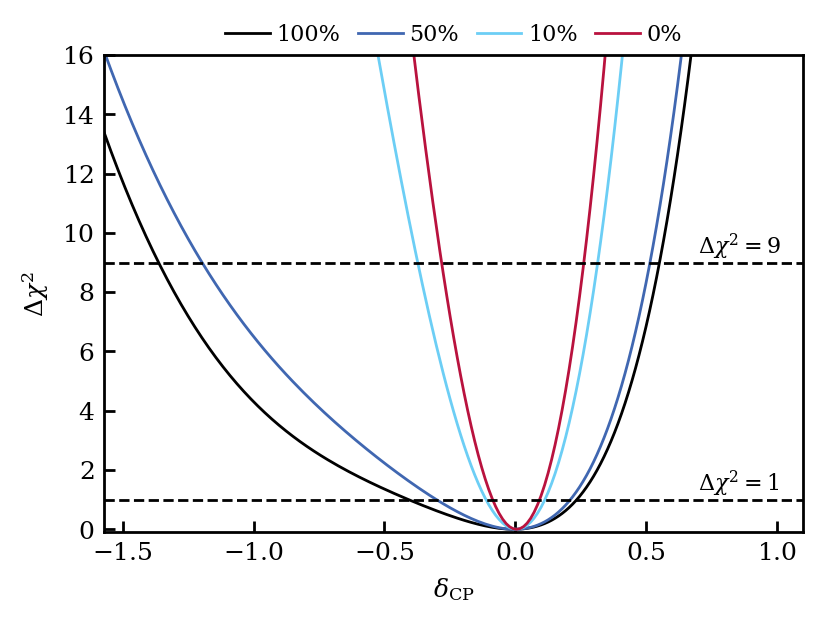

In [18]:
delta_cp_list = np.linspace(-np.pi / 2, 1.1, 201)

fig, ax = plt.subplots(1, 1, figsize=(4, 3))

scales = [0.001, 0.1, 0.5, 1.0][::-1]

fval = dict()
for scale in tqdm(scales):
    fval[scale] = []
    for delta_cp in delta_cp_list:
        fval[scale].append(min_likelihood_func([delta_cp, SIN_2_THETA_23, 0.0, scale]).fval)
    fval[scale] = np.array(fval[scale])

colors = []
for scale in scales:
    p = ax.plot(
        delta_cp_list,
        fval[scale] - fval[scale].min(),
        label=f"{int(scale * 100)}%",
    )
    colors.append(p[0].get_color())

ax.legend(ncols=len(scales))
x = delta_cp_list[0] * 0.15 + delta_cp_list[-1] * 0.85
ax.text(x, 1.3, r"$\Delta \chi^2=1$", fontsize=8)
ax.text(x, 9.3, r"$\Delta \chi^2=9$", fontsize=8)
ax.axhline(1, linestyle="dashed")
ax.axhline(9, linestyle="dashed")

ax.set_xlabel(r"$\delta_{\mathrm{CP}}$")
ax.set_ylabel(r"$\Delta \chi^2$")
ax.set_xlim(delta_cp_list[0], delta_cp_list[-1])
ax.set_ylim(-0.1, 16)

fig.savefig("delta_cp_delta_chi2.svg", transparent=True, dpi=800)

plt.show()

In [19]:
sin_2_theta_23_list = np.linspace(0.4, 0.8, 51)
delta_cp_list = np.linspace(-np.pi / 2, 1.1, 51)
X, Y = np.meshgrid(sin_2_theta_23_list, delta_cp_list, indexing="ij")

scales = [0.001, 0.1, 0.5, 1.0][::-1]

fval = dict()
for scale in scales:
    fval[scale] = []
    for sin_2_theta_23 in tqdm(sin_2_theta_23_list):
        for delta_cp in delta_cp_list:
            fval[scale].append(min_likelihood_func([delta_cp, sin_2_theta_23, 0.0, scale]).fval)
    fval[scale] = np.array(fval[scale]).reshape((len(sin_2_theta_23_list), len(delta_cp_list)))

100%|██████████| 51/51 [00:20<00:00,  2.50it/s]


/scratch/local/jobs/26908734/ipykernel_3743082/1650912436.py:12: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  x, y = c.collections[0].get_paths()[0].vertices.T


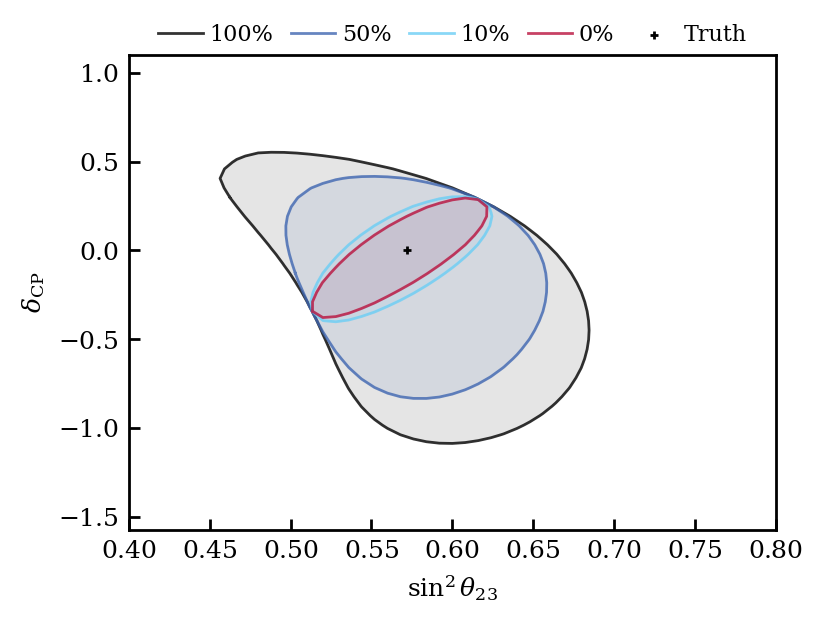

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))

for scale, color in zip(scales, colors):
    c = ax.contourf(
        X,
        Y,
        fval[scale],
        [fval[scale].min(), fval[scale].min() + norm.ppf(norm.cdf(3) - norm.cdf(-3), 2)],
        colors=[color, color],
        alpha=0.1,
    )
    x, y = c.collections[0].get_paths()[0].vertices.T
    ax.plot(x, y, label=f"{int(scale * 100)}%", color=color, alpha=0.8)

ax.scatter(SIN_2_THETA_23, 0.0, marker="+", color="k", label="Truth")

ax.legend(ncols=len(scales) + 1)
ax.set_xlabel(r"$\sin^2\theta_{23}$")
ax.set_ylabel(r"$\delta_{\mathrm{CP}}$")

fig.savefig("sin_2_theta_23_delta_cp.svg", transparent=True, dpi=800)

plt.show()